In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import numpy as np

In [322]:
#Accessing all the nc files
path=[]

#Storing the paths in a array
for i in range(1901,2023):
    path.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Data\RF25_ind{i}_rfp25.nc")
    
#Accessing all the datasets and storing all data in all_data list
all_data=[]
for i in path:
    temp = xarray.open_dataset(i)
    all_data.append(temp)


In [323]:
#Accessing the indian sub divisions zones file
sub_divisions_file=pd.read_excel(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\india_spatial_zones.xlsx")
sub_divisions_file=sub_divisions_file.T      #Taking Transpose
sub_divisions_file=np.rot90(sub_divisions_file)   #Rotating 90degree


In [324]:
print(sub_divisions_file.shape)

(129, 135)


In [325]:
def selectJuneToSeptember(data,year):
    start_date = f'{year}-06-01'
    end_date = f'{year}-09-30'
    return data.sel(time=slice(start_date, end_date))

In [326]:
def PlotMap(data,year=0):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 0.0  # Minimum value for the color scale
    vmax = 10.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Average Yearly Rainfall Data of {year} from June to September')

In [328]:
#Extracting the data between month JJAS
year = 1901
for i in range(len(all_data)):
    all_data[i] = selectJuneToSeptember(all_data[i],year)
    
    #Removing the nan values
    all_data[i] = all_data[i].where(all_data[i]['rain'] != -999.)
    year+=1


In [329]:
#Extracting the weekly average data form June to September
#Total there will be 18 weeks in jjas
jjas_weekly_data=[]
all_year_jjas_weekly_data=[]

for i in range(len(all_data)):
    for j in range(0,len(all_data[i]['rain']),7):
        jjas_weekly_data.append(all_data[i]['rain'][j:j+7].mean(dim='time'))
    all_year_jjas_weekly_data.append(jjas_weekly_data)
    jjas_weekly_data=[]
    
#PlotMap(zone1[0]['rain'][0:7].mean(dim='time'))
#all_year_jjas_weekly_data[0][0]

In [330]:
#Initializing the NaN arrays for the zonal regions
nan_data_array1=[]
nan_data_array2=[]
nan_data_array3=[]
nan_data_array4=[]
nan_data_array5=[]
nan_data_array6=[]

zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]


for i in range(len(all_year_jjas_weekly_data)):
    for j in range(len(all_year_jjas_weekly_data[i])):
        nan_data_array1.append(all_year_jjas_weekly_data[i][j].where(False))
        nan_data_array2.append(all_year_jjas_weekly_data[i][j].where(False))
        nan_data_array3.append(all_year_jjas_weekly_data[i][j].where(False))
        nan_data_array4.append(all_year_jjas_weekly_data[i][j].where(False))
        nan_data_array5.append(all_year_jjas_weekly_data[i][j].where(False))
        nan_data_array6.append(all_year_jjas_weekly_data[i][j].where(False))
    zone1.append(nan_data_array1)
    zone2.append(nan_data_array2)
    zone3.append(nan_data_array3)
    zone4.append(nan_data_array4)
    zone5.append(nan_data_array5)
    zone6.append(nan_data_array6)
    nan_data_array1=[]
    nan_data_array2=[]
    nan_data_array3=[]
    nan_data_array4=[]
    nan_data_array5=[]
    nan_data_array6=[]

In [331]:
#Extracting the zonal information for each year for 18weeks between time June to September
year=1901
for k in range(len(all_year_jjas_weekly_data)):
    for l in range(len(all_year_jjas_weekly_data[k])):
        for i in range(129):
            for j in range(129):
                if(sub_divisions_file[i][j]==2):
                    zone1[k][l][i][j]=all_year_jjas_weekly_data[k][l][i][j]
                elif(sub_divisions_file[i][j]==3):
                    zone2[k][l][i][j]=all_year_jjas_weekly_data[k][l][i][j]
                elif(sub_divisions_file[i][j]==4):
                    zone3[k][l][i][j]=all_year_jjas_weekly_data[k][l][i][j]
                elif(sub_divisions_file[i][j]==6):
                    zone4[k][l][i][j]=all_year_jjas_weekly_data[k][l][i][j]
                elif(sub_divisions_file[i][j]==7):
                    zone5[k][l][i][j]=all_year_jjas_weekly_data[k][l][i][j]
                elif(sub_divisions_file[i][j]==8):
                    zone6[k][l][i][j]=all_year_jjas_weekly_data[k][l][i][j]
    print(f"Year {year} done")
    year+=1
                
            


Year 1901 done
Year 1902 done
Year 1903 done
Year 1904 done
Year 1905 done
Year 1906 done
Year 1907 done
Year 1908 done
Year 1909 done
Year 1910 done
Year 1911 done
Year 1912 done
Year 1913 done
Year 1914 done
Year 1915 done
Year 1916 done
Year 1917 done
Year 1918 done
Year 1919 done
Year 1920 done
Year 1921 done
Year 1922 done
Year 1923 done
Year 1924 done
Year 1925 done
Year 1926 done
Year 1927 done
Year 1928 done
Year 1929 done
Year 1930 done
Year 1931 done
Year 1932 done
Year 1933 done
Year 1934 done
Year 1935 done
Year 1936 done
Year 1937 done
Year 1938 done
Year 1939 done
Year 1940 done
Year 1941 done
Year 1942 done
Year 1943 done
Year 1944 done
Year 1945 done
Year 1946 done
Year 1947 done
Year 1948 done
Year 1949 done
Year 1950 done
Year 1951 done
Year 1952 done
Year 1953 done
Year 1954 done
Year 1955 done
Year 1956 done
Year 1957 done
Year 1958 done
Year 1959 done
Year 1960 done
Year 1961 done
Year 1962 done
Year 1963 done
Year 1964 done
Year 1965 done
Year 1966 done
Year 1967 

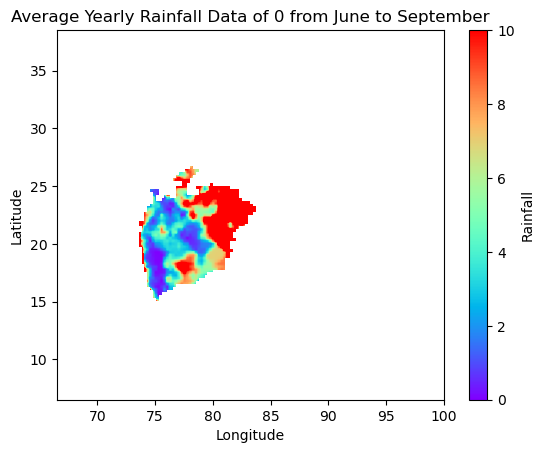

In [345]:
PlotMap(zone5[0][5])

In [351]:
#Getting the mean of a zone for every year
zone1_means=[]
zone2_means=[]
zone3_means=[]
zone4_means=[]
zone5_means=[]
zone6_means=[]

for i in range(len(zone1)):
    stacked_array_zone1 = np.stack(zone1[i], axis=0)
    stacked_array_zone2 = np.stack(zone2[i], axis=0)
    stacked_array_zone3 = np.stack(zone3[i], axis=0)
    stacked_array_zone4 = np.stack(zone4[i], axis=0)
    stacked_array_zone5 = np.stack(zone5[i], axis=0)
    stacked_array_zone6 = np.stack(zone6[i], axis=0)

    # Calculate the mean along the stacked axis
    mean_array_zone1 = np.mean(stacked_array_zone1, axis=0)
    mean_array_zone2 = np.mean(stacked_array_zone2, axis=0)
    mean_array_zone3 = np.mean(stacked_array_zone3, axis=0)
    mean_array_zone4 = np.mean(stacked_array_zone4, axis=0)
    mean_array_zone5 = np.mean(stacked_array_zone5, axis=0)
    mean_array_zone6 = np.mean(stacked_array_zone6, axis=0)
    
    lat=all_year_jjas_weekly_data[0][0]['lat']
    lon=all_year_jjas_weekly_data[0][0]['lon']
    zone1_means.append(xarray.DataArray(mean_array_zone1, coords=[lat, lon], dims=['lat', 'lon']))
    zone2_means.append(xarray.DataArray(mean_array_zone2, coords=[lat, lon], dims=['lat', 'lon']))
    zone3_means.append(xarray.DataArray(mean_array_zone3, coords=[lat, lon], dims=['lat', 'lon']))
    zone4_means.append(xarray.DataArray(mean_array_zone4, coords=[lat, lon], dims=['lat', 'lon']))
    zone5_means.append(xarray.DataArray(mean_array_zone5, coords=[lat, lon], dims=['lat', 'lon']))
    zone6_means.append(xarray.DataArray(mean_array_zone6, coords=[lat, lon], dims=['lat', 'lon']))



C:\Users\ratho\AppData\Local\Temp\ipykernel_7976\3497992244.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


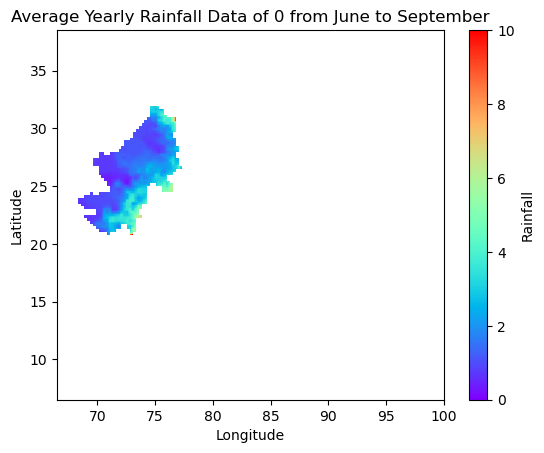

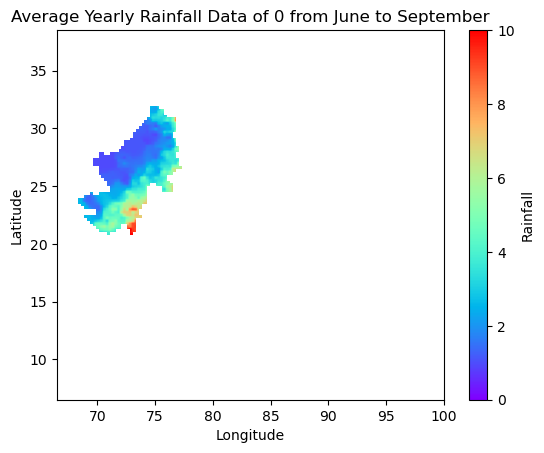

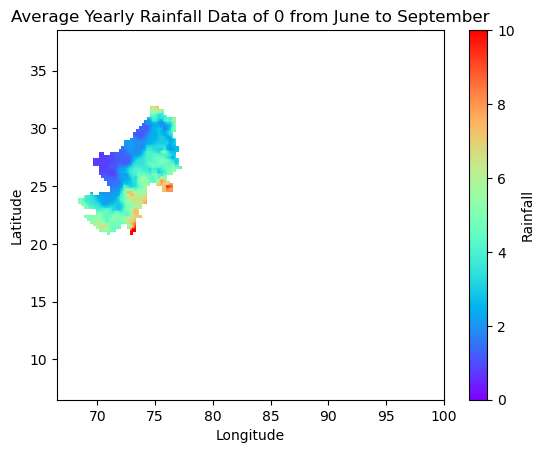

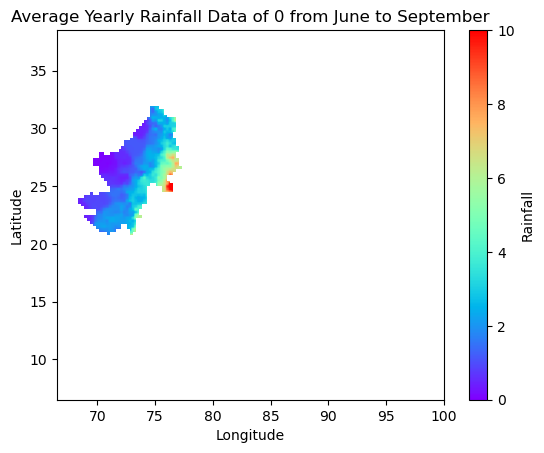

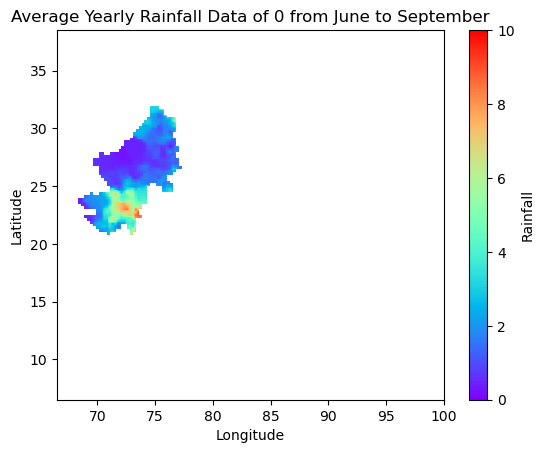

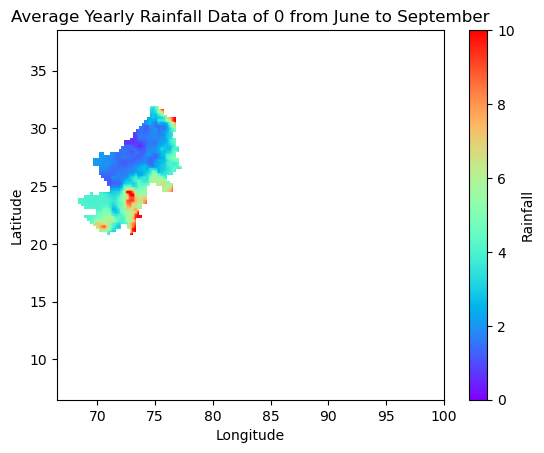

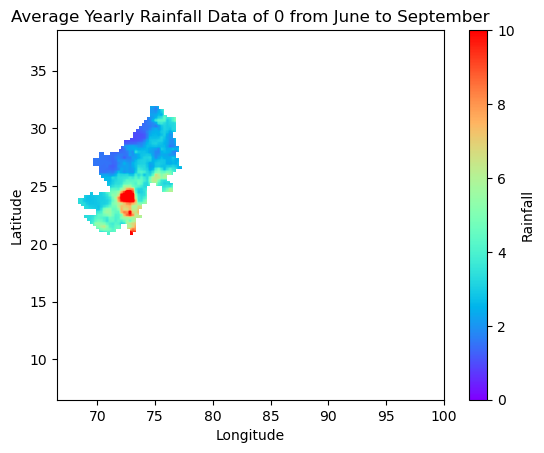

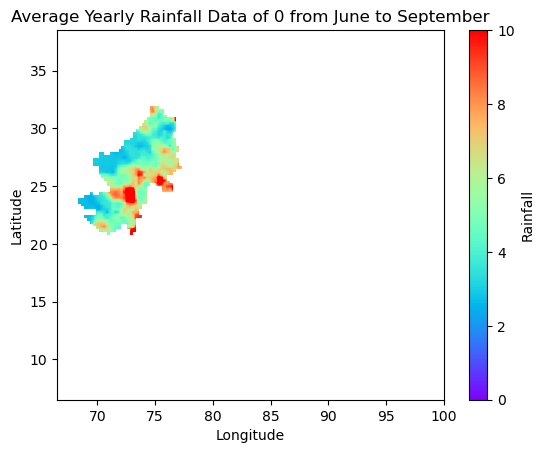

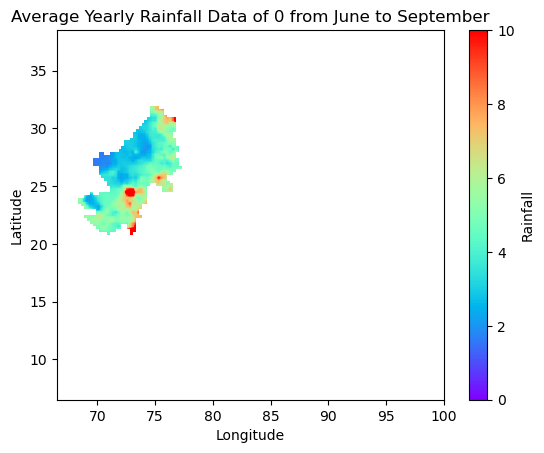

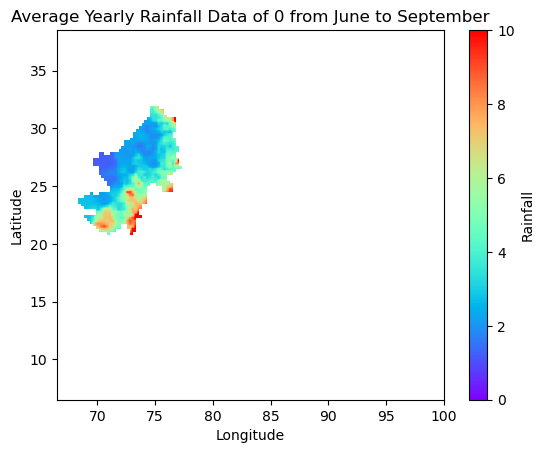

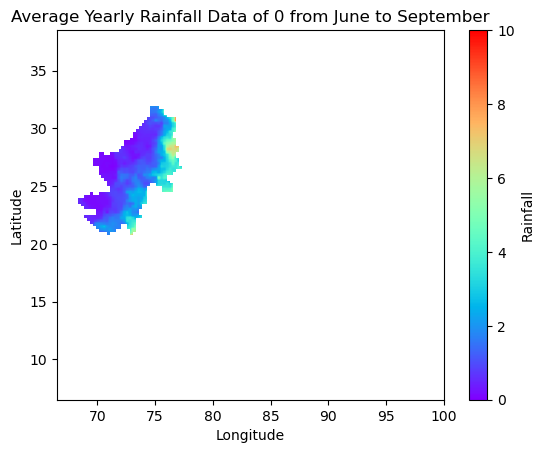

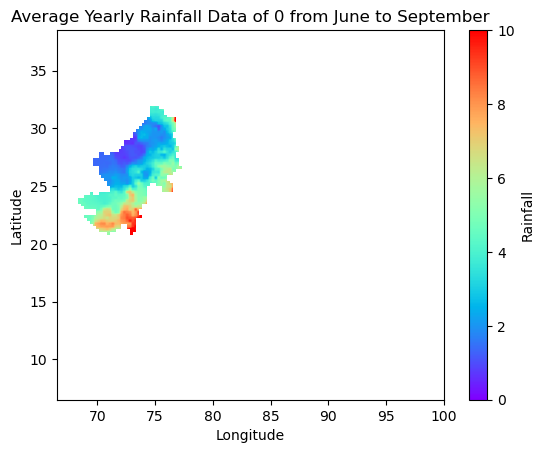

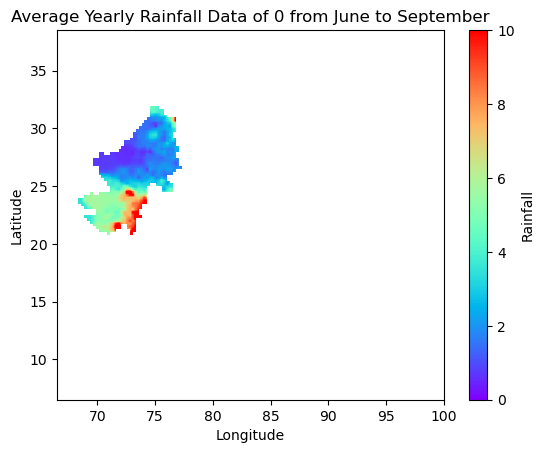

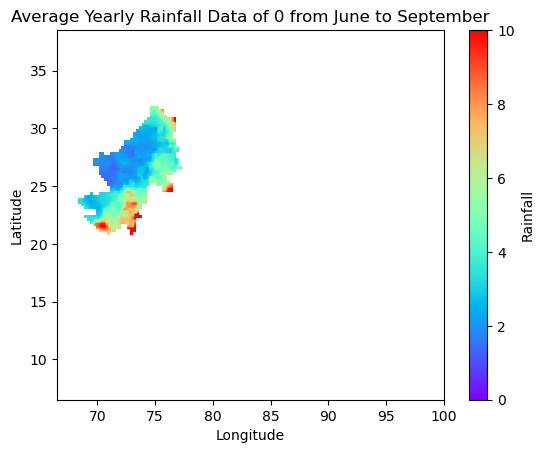

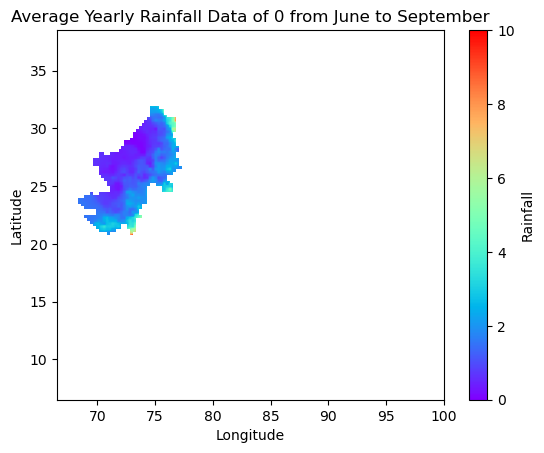

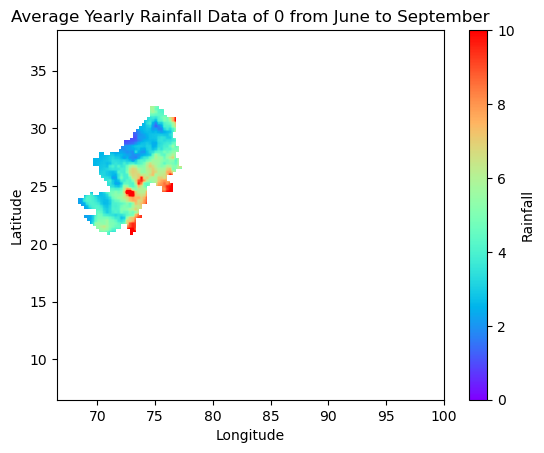

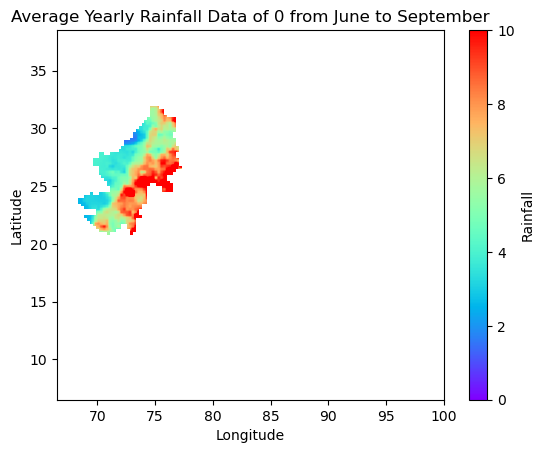

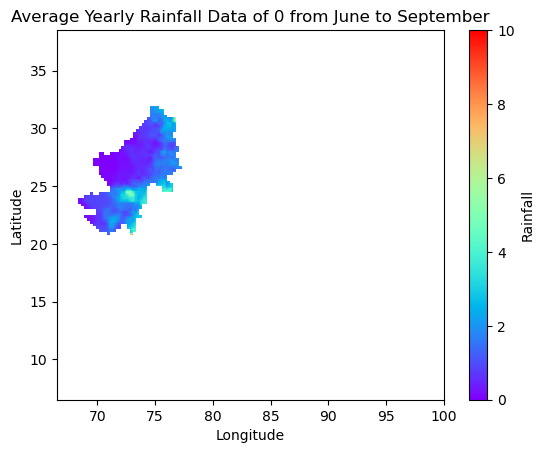

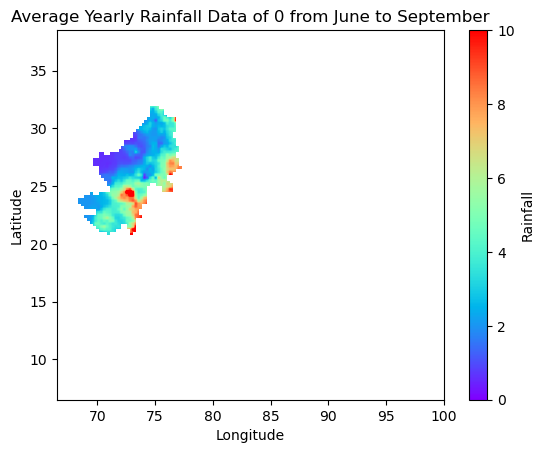

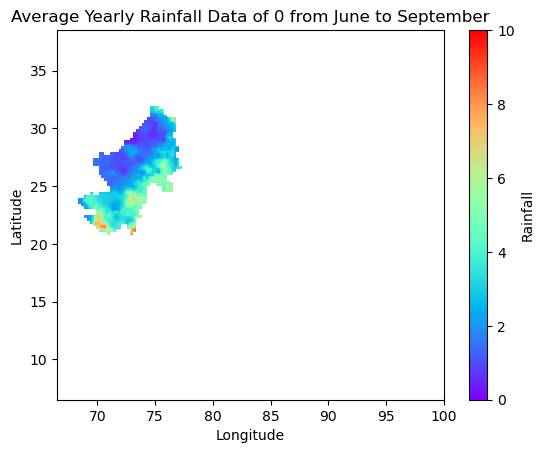

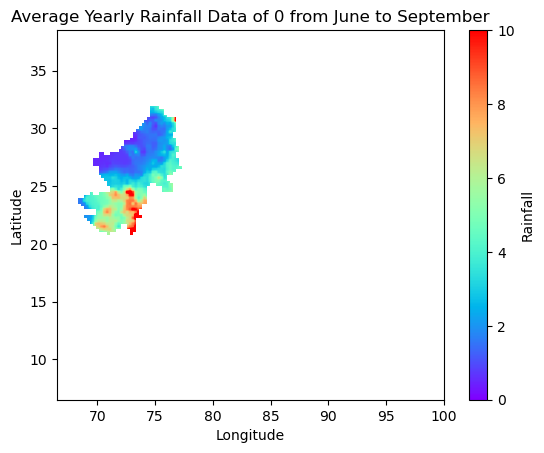

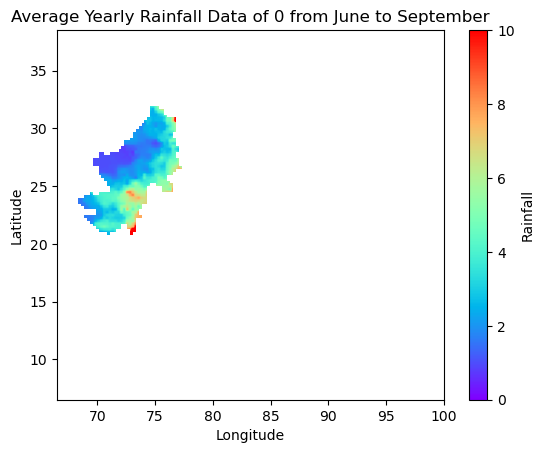

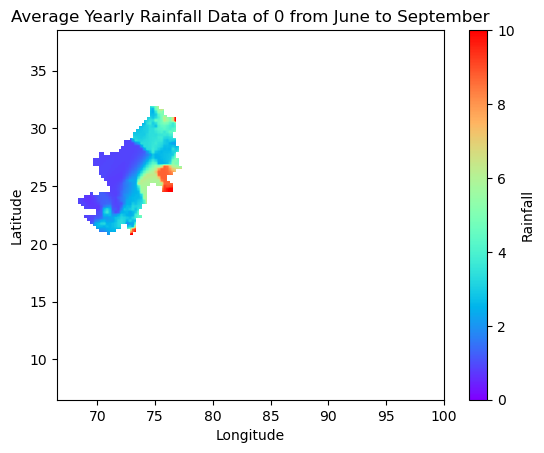

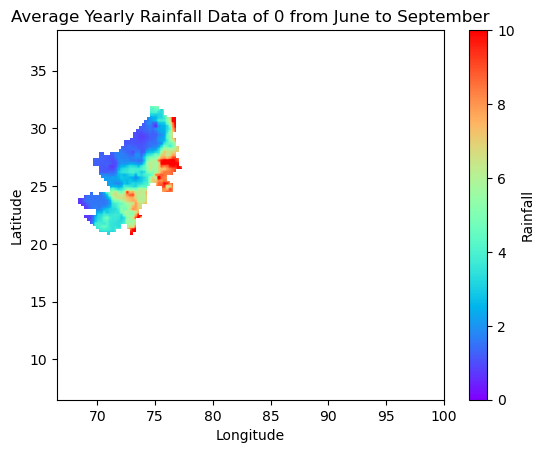

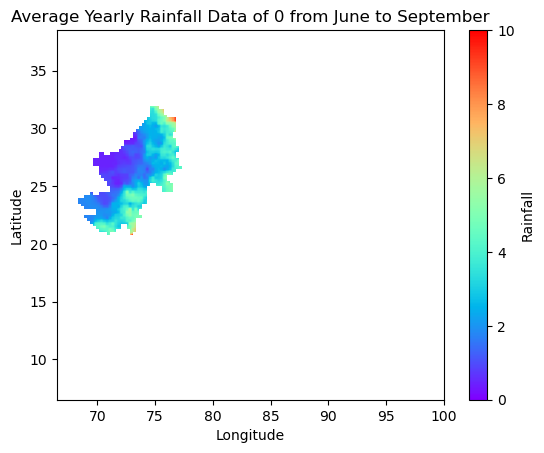

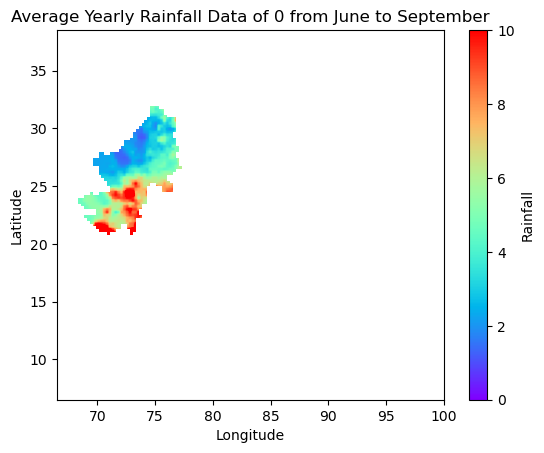

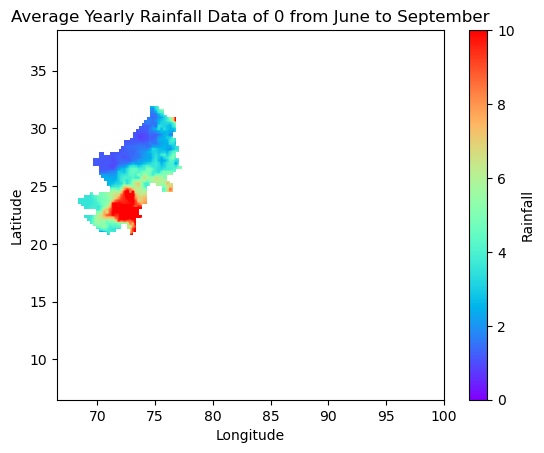

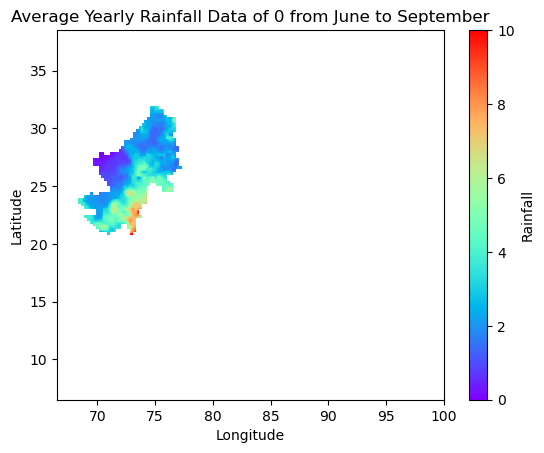

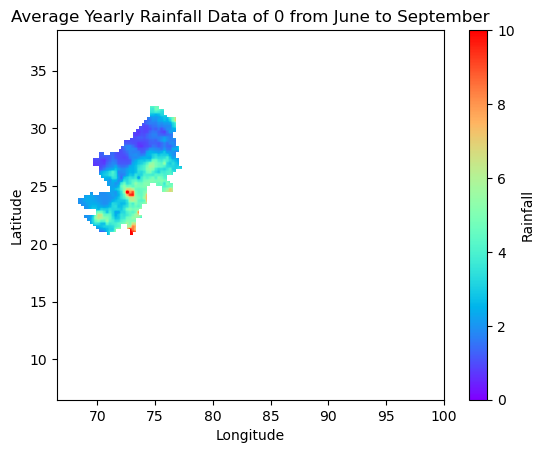

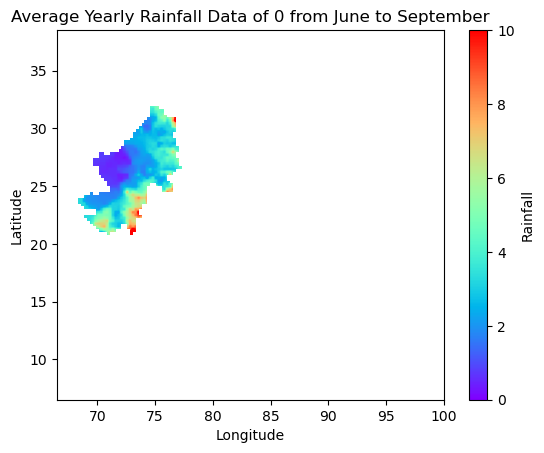

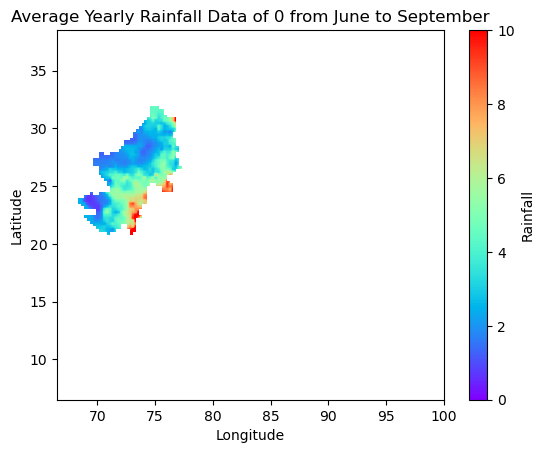

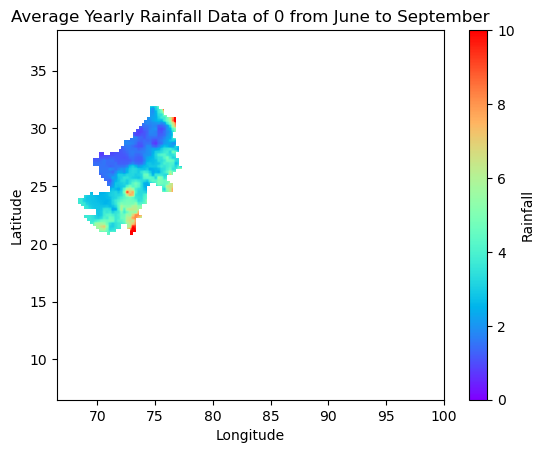

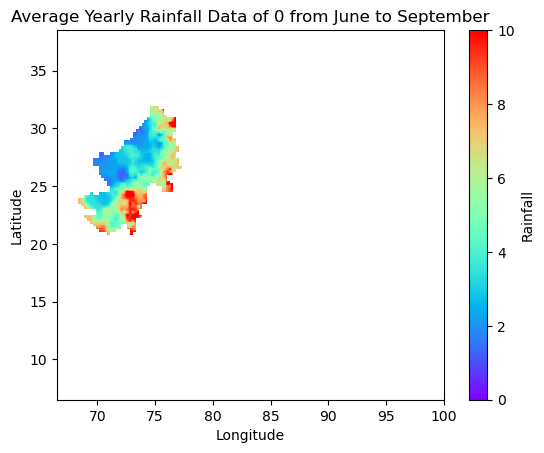

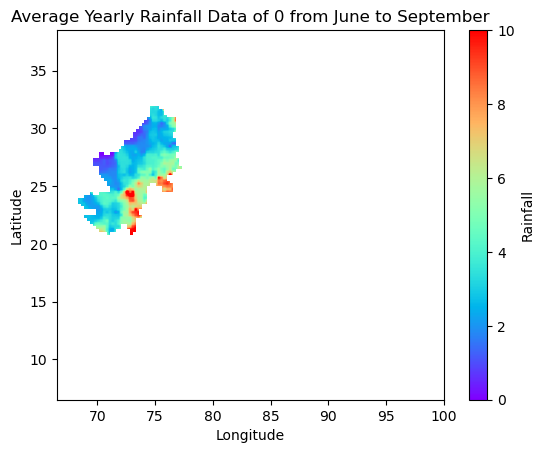

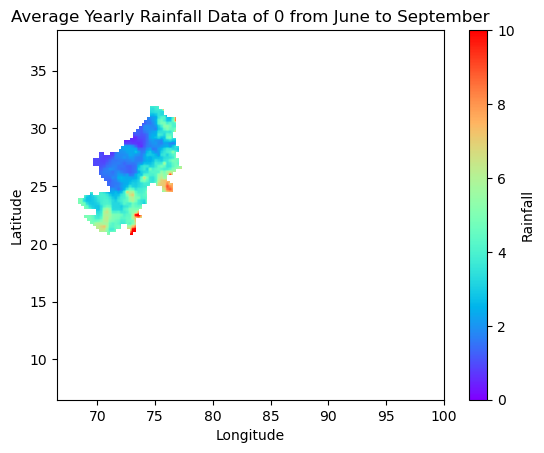

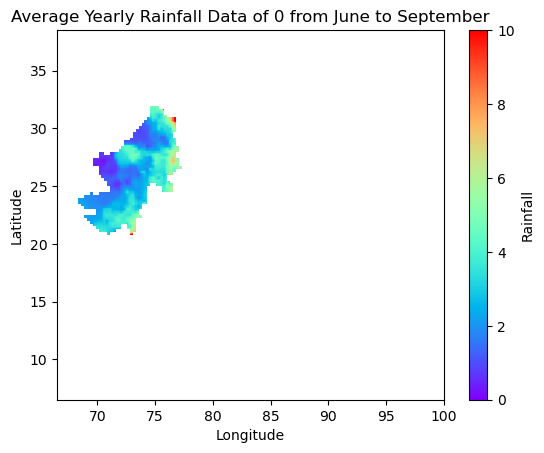

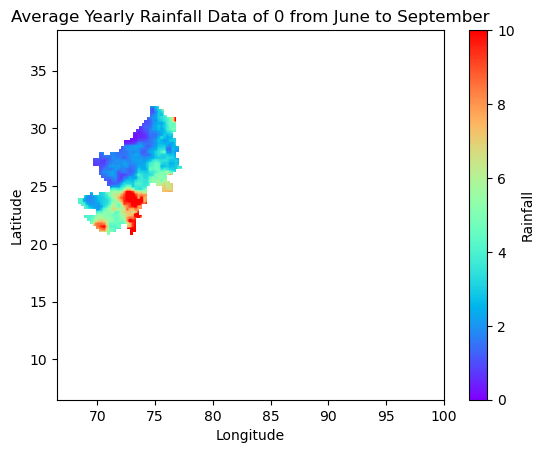

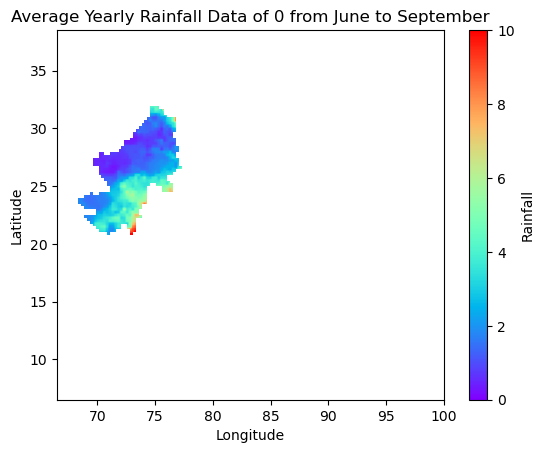

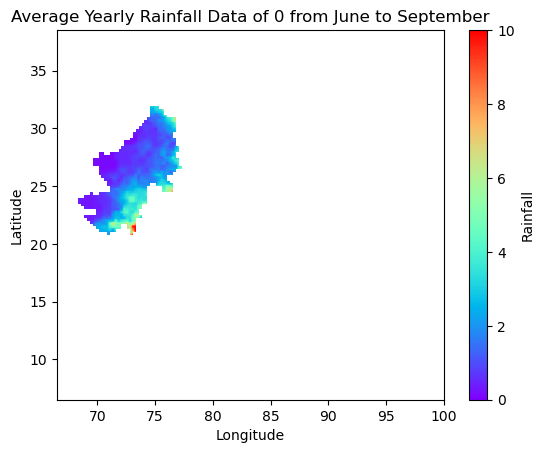

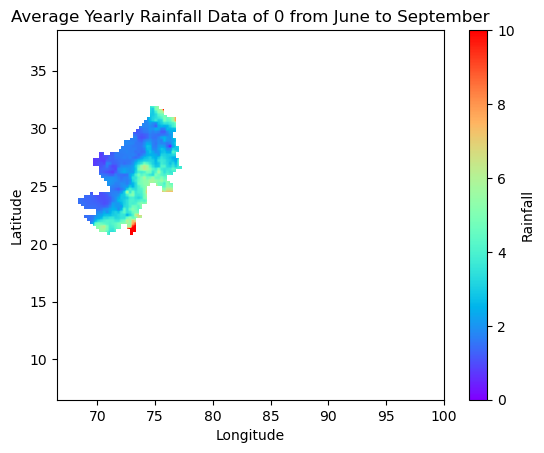

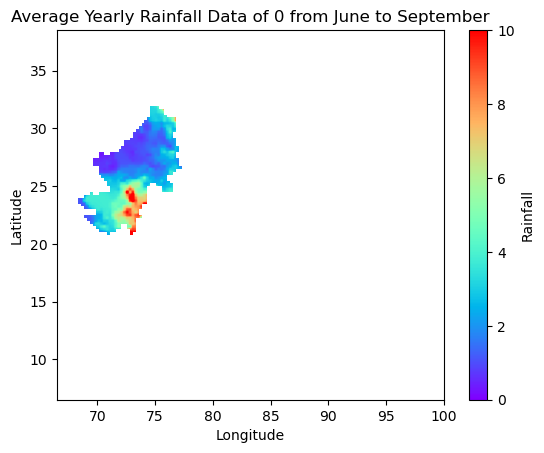

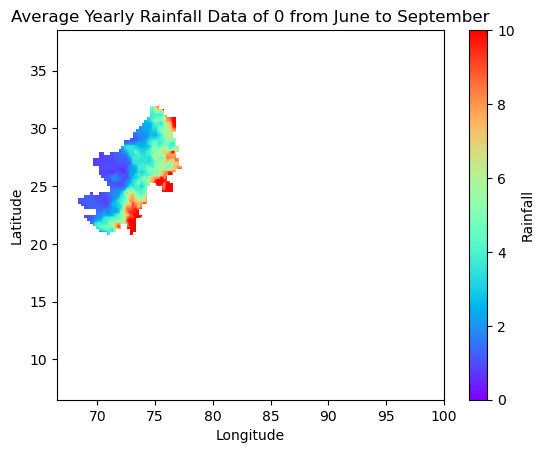

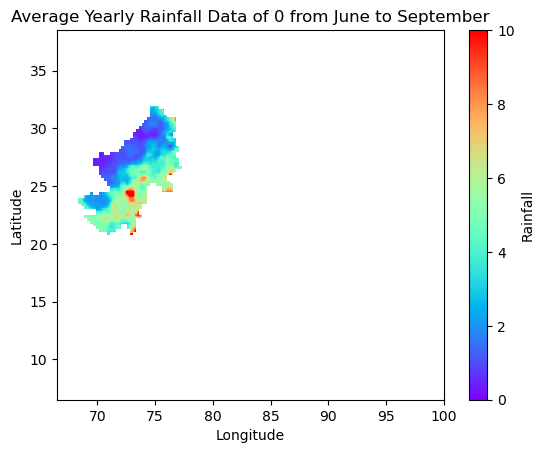

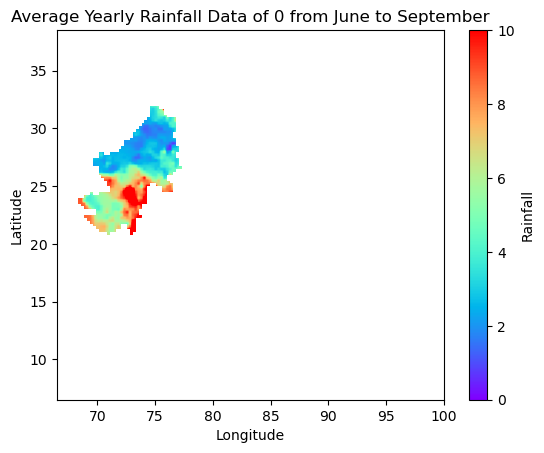

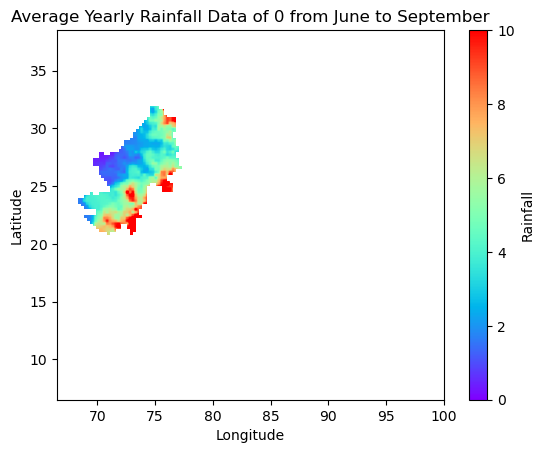

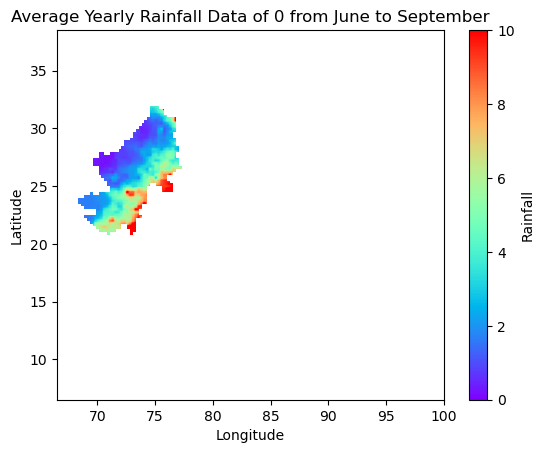

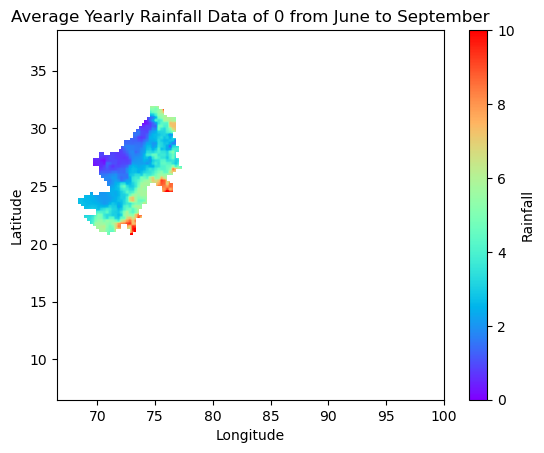

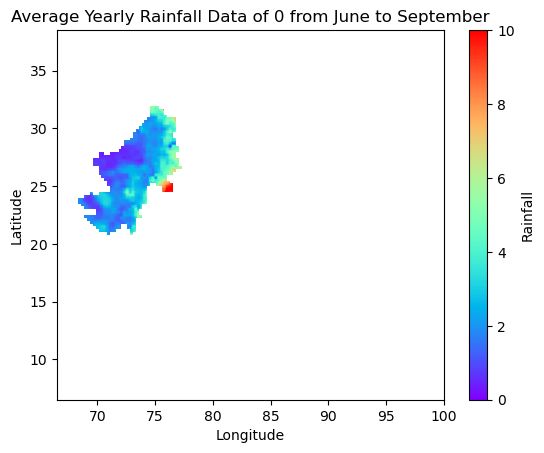

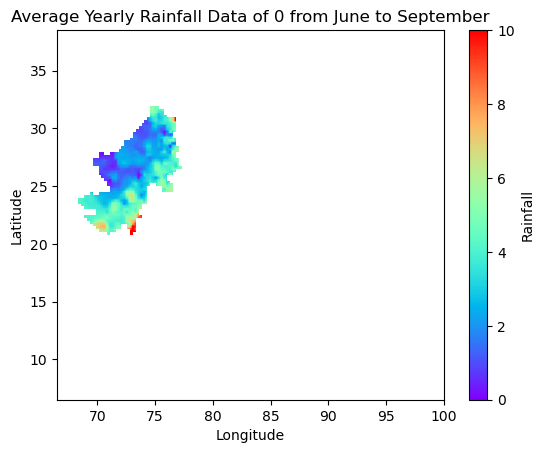

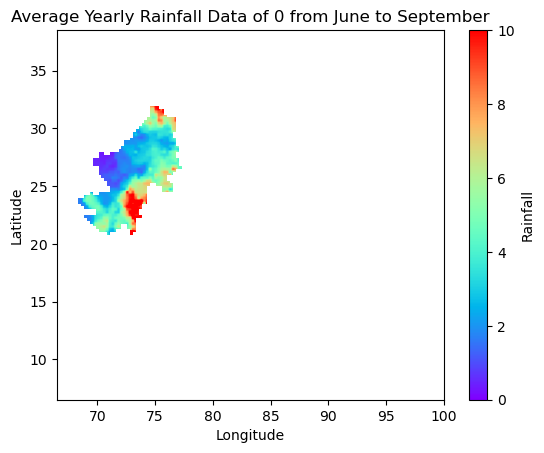

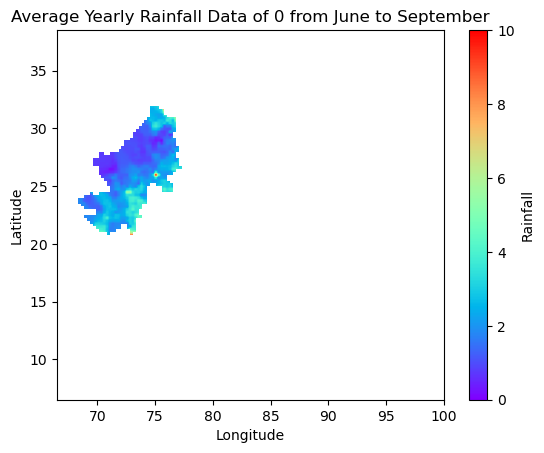

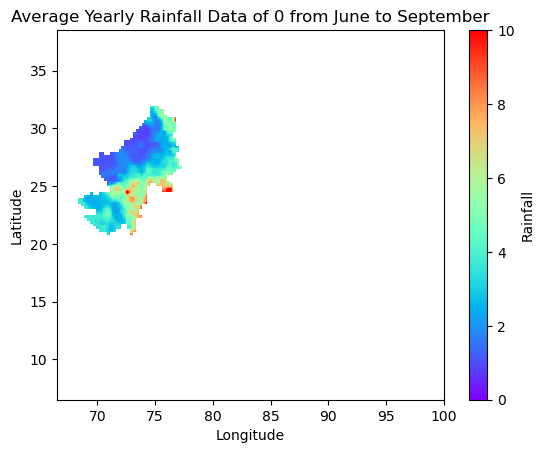

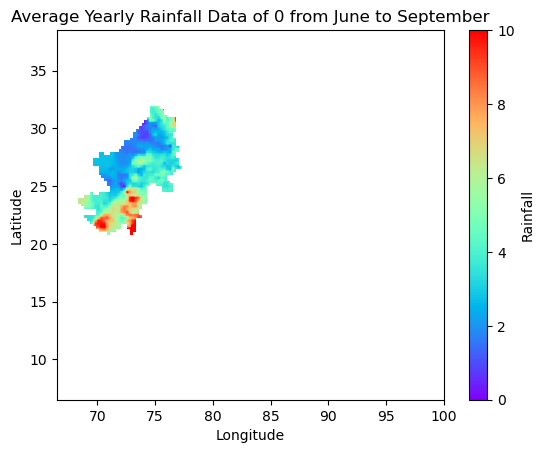

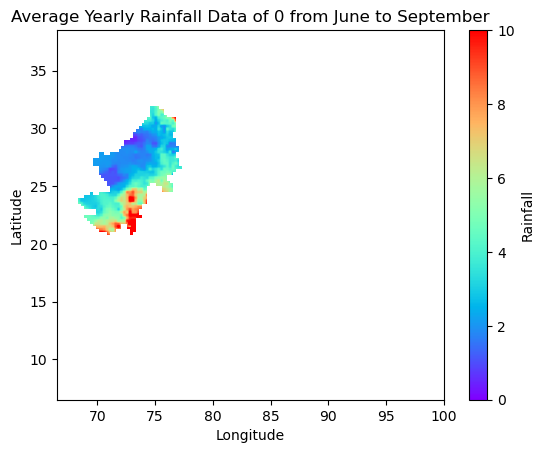

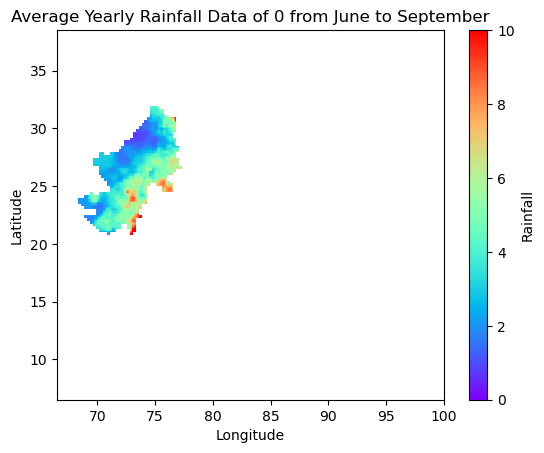

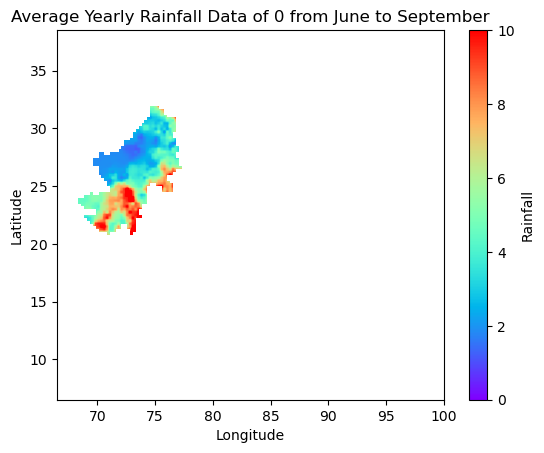

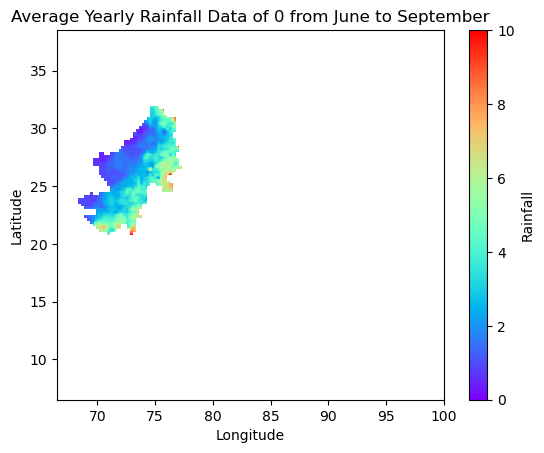

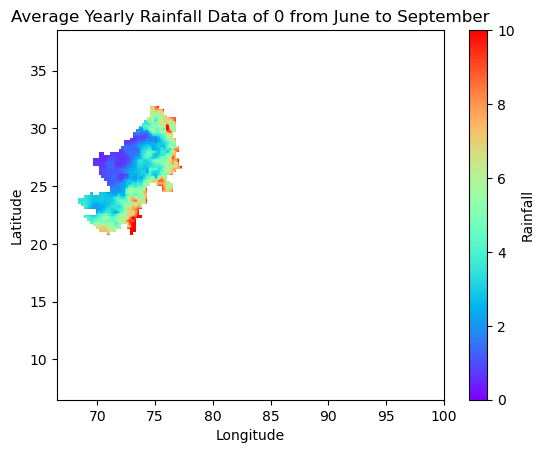

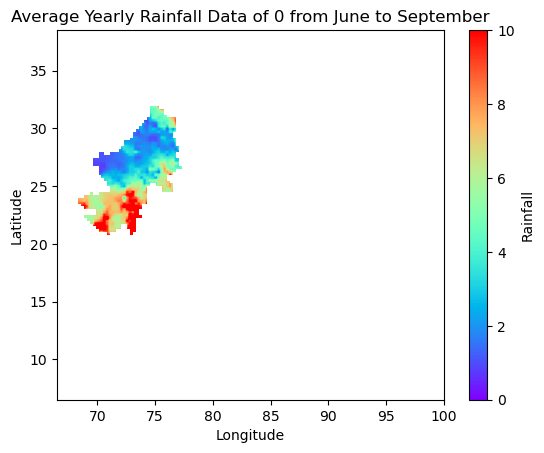

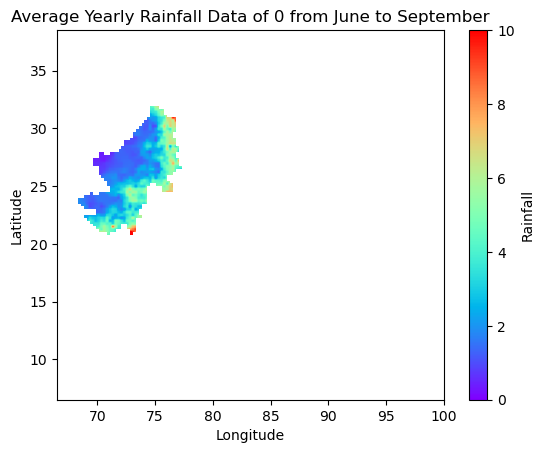

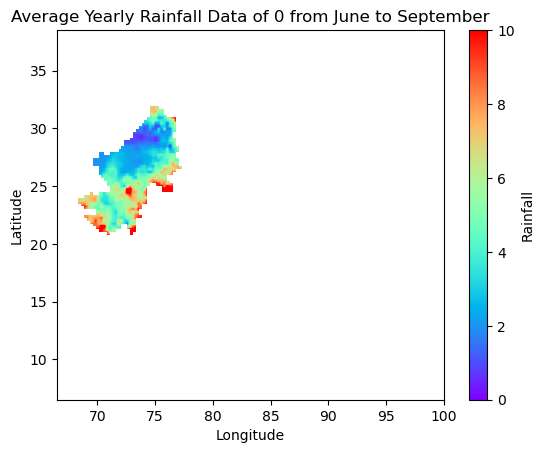

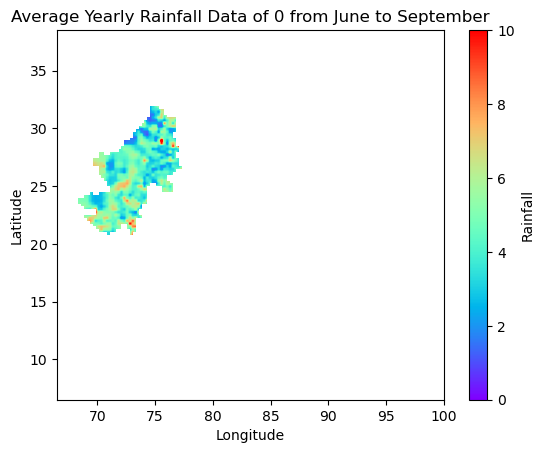

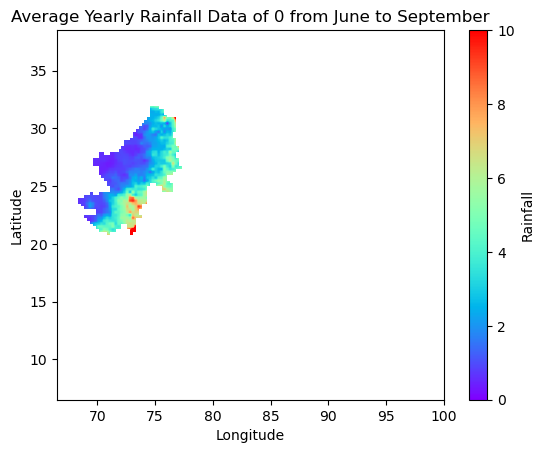

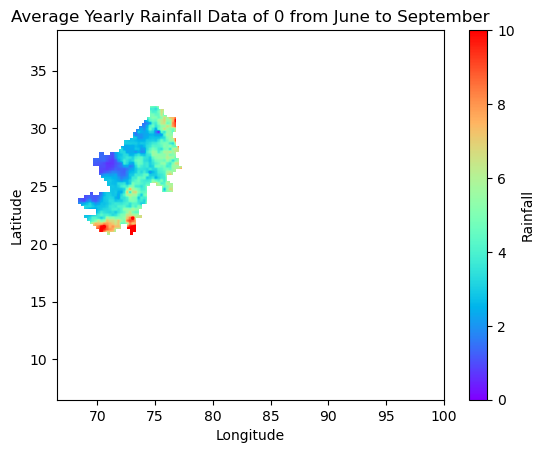

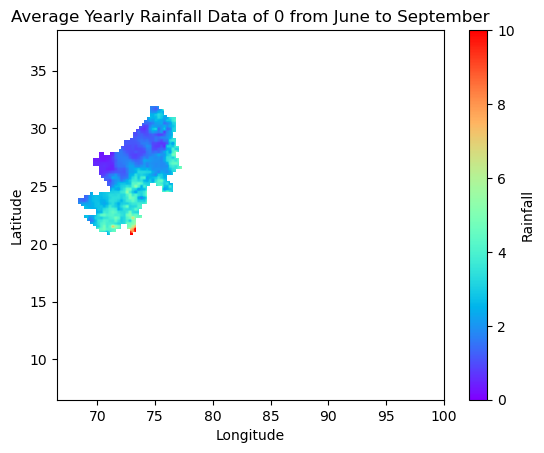

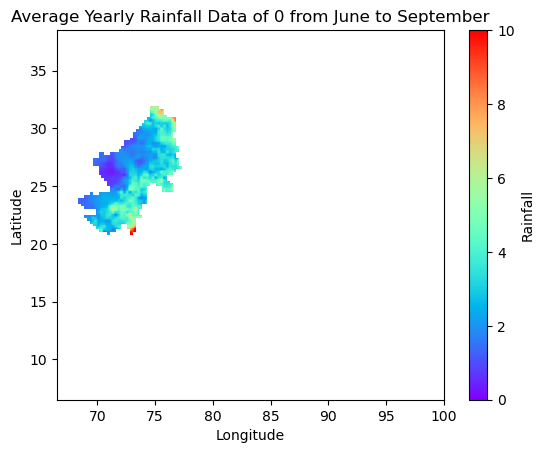

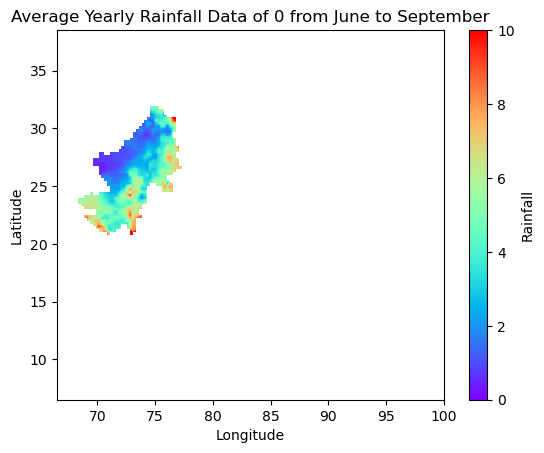

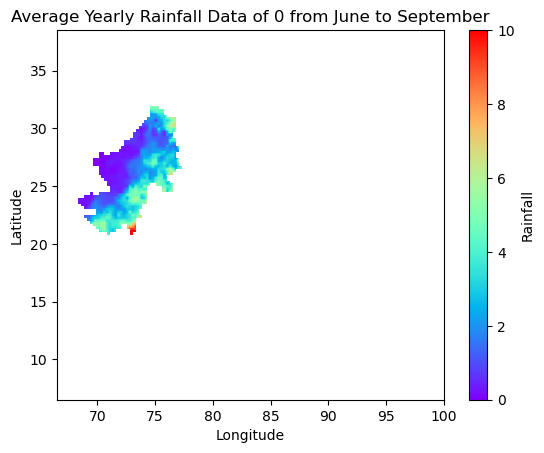

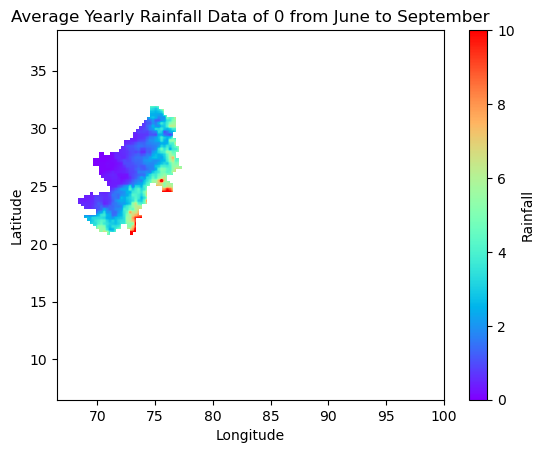

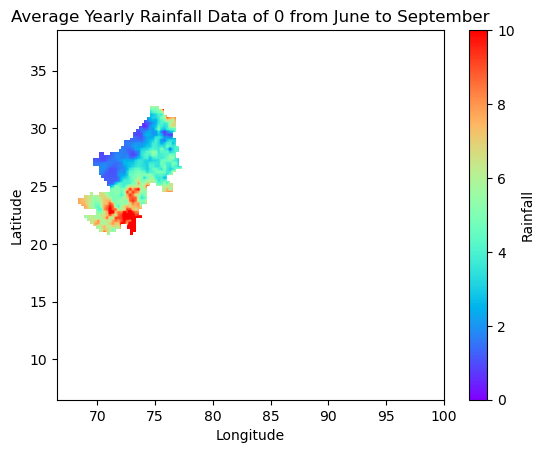

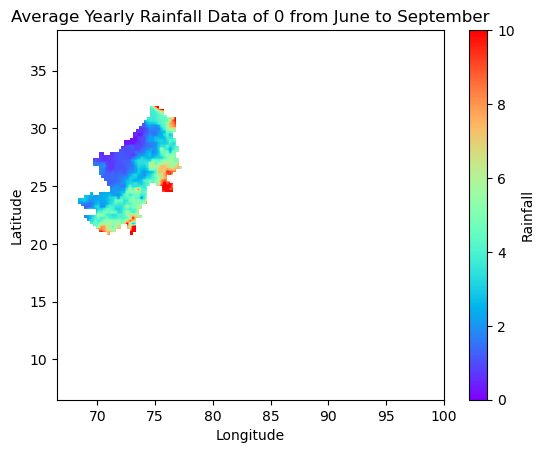

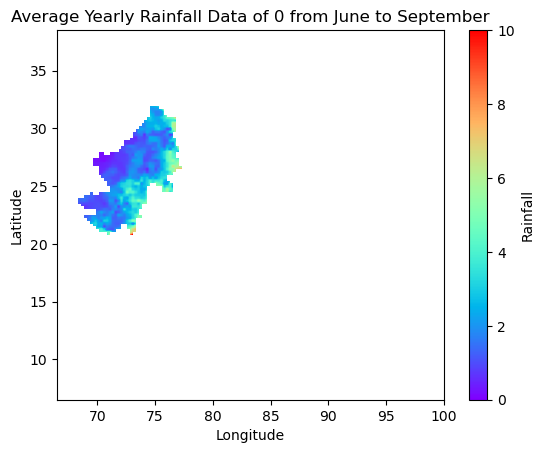

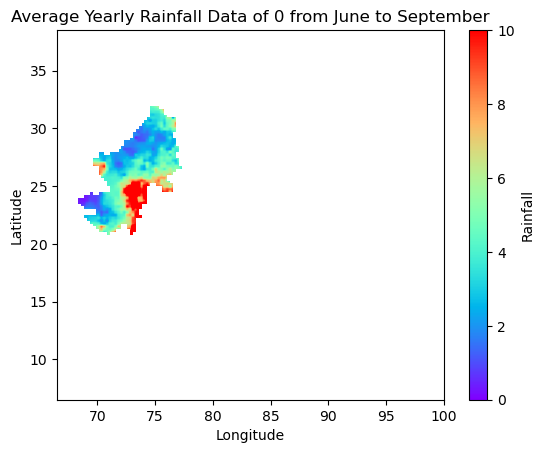

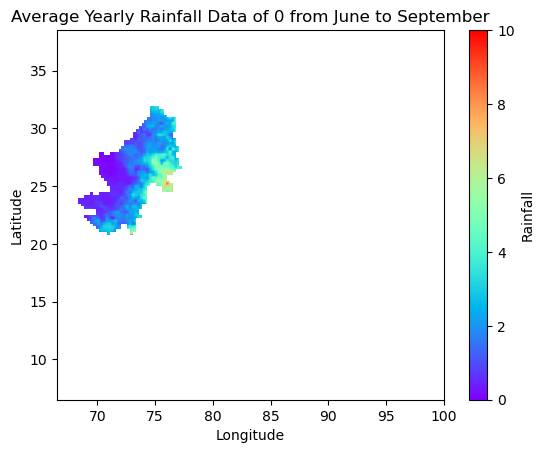

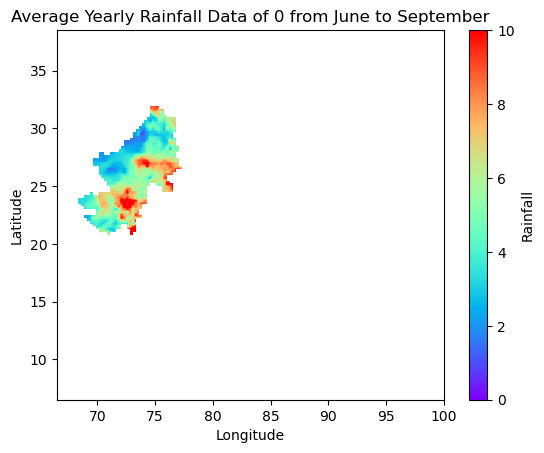

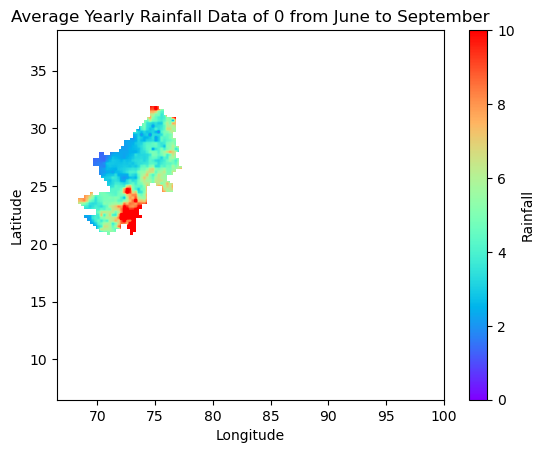

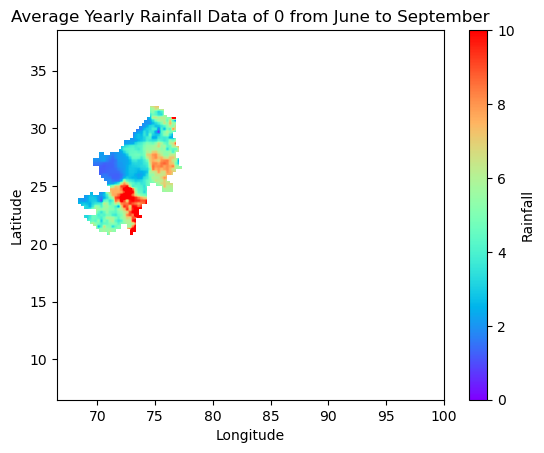

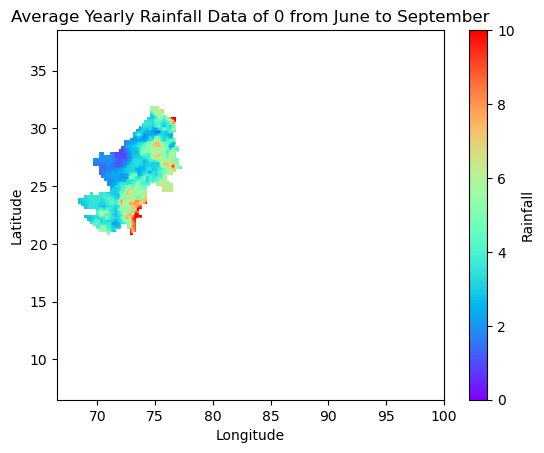

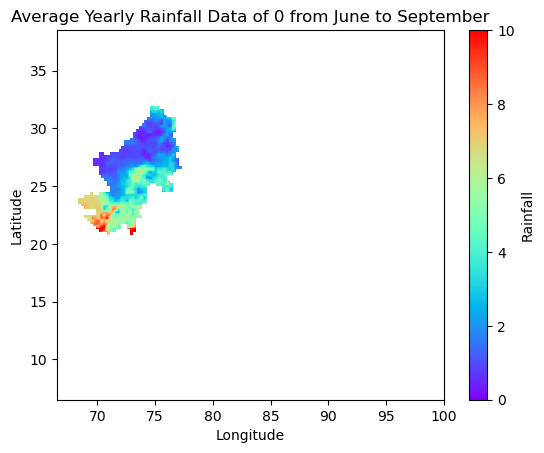

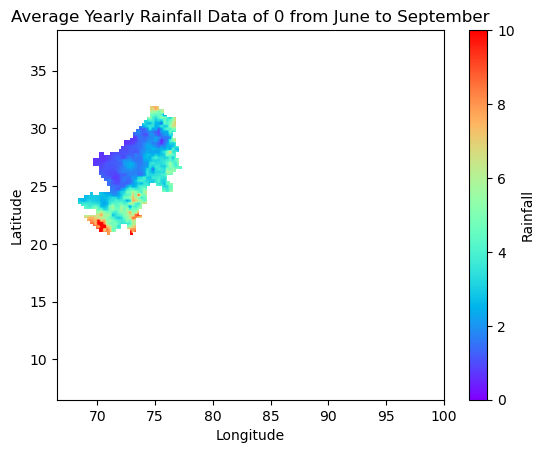

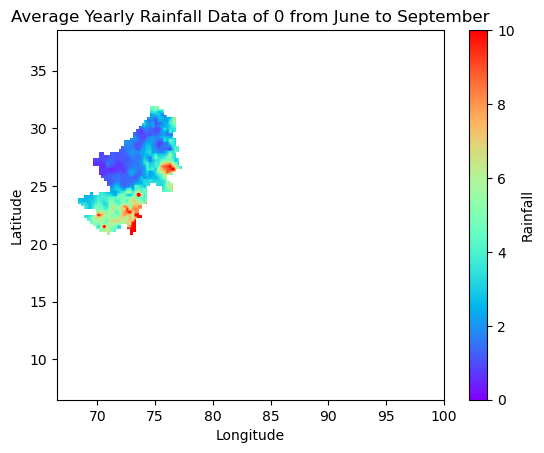

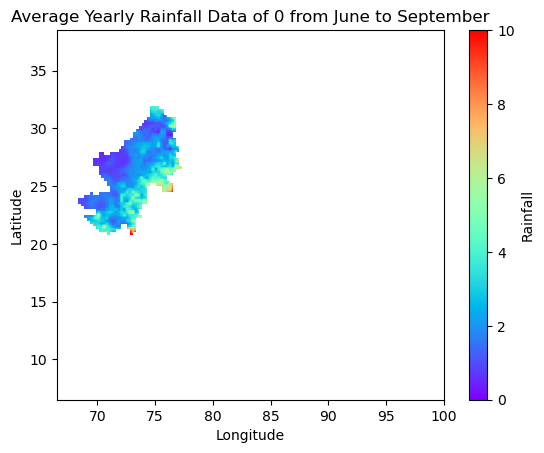

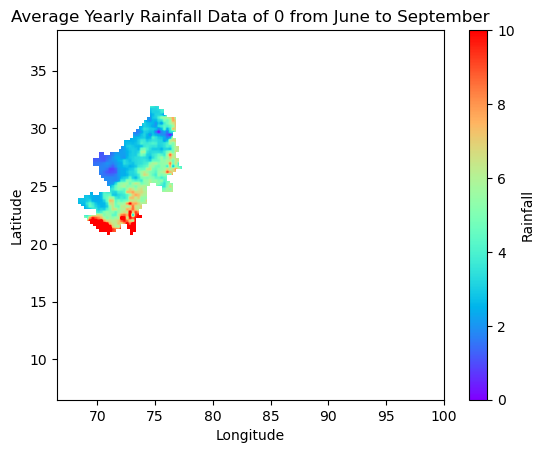

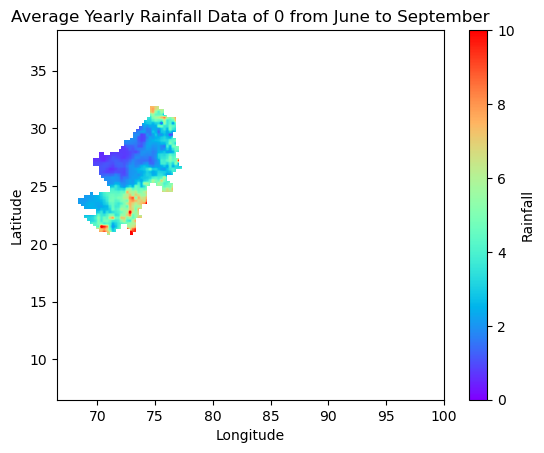

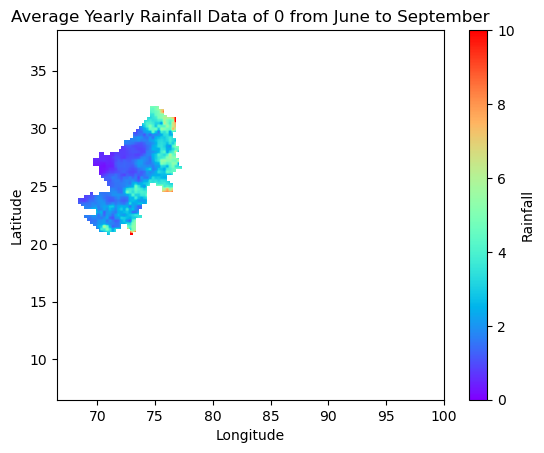

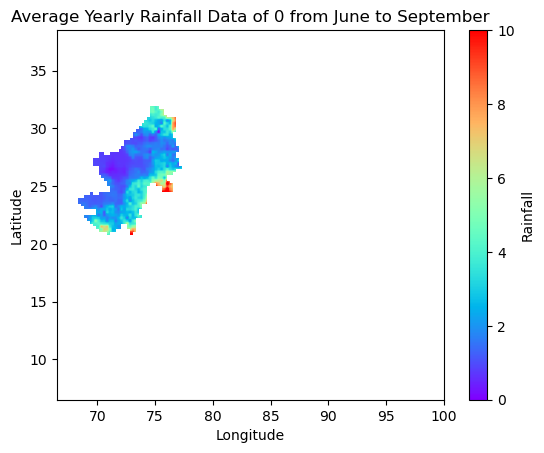

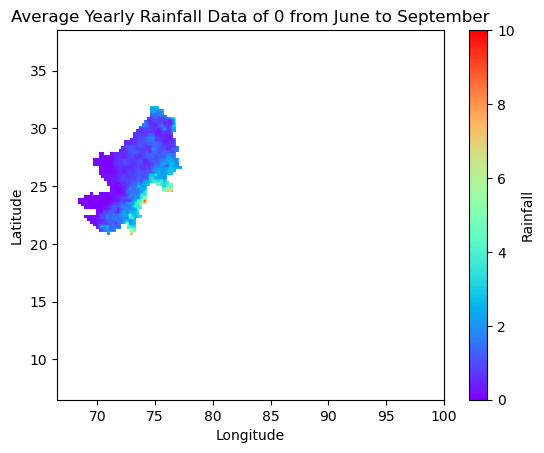

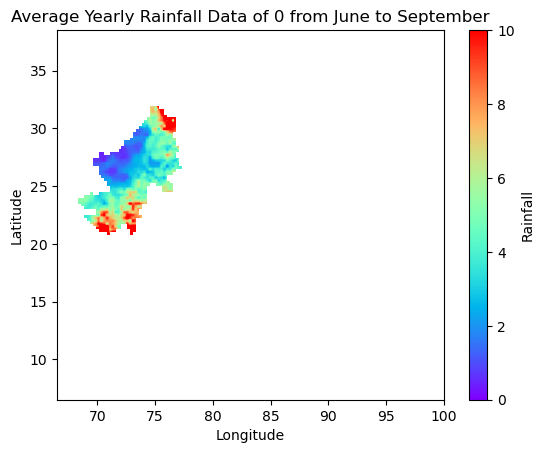

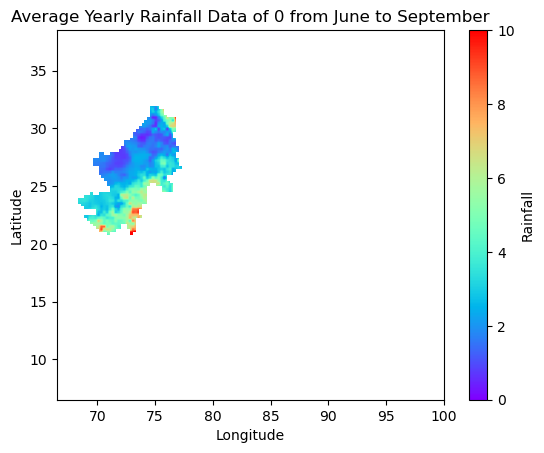

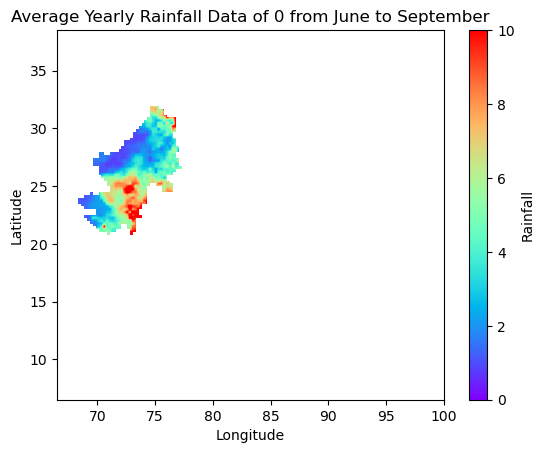

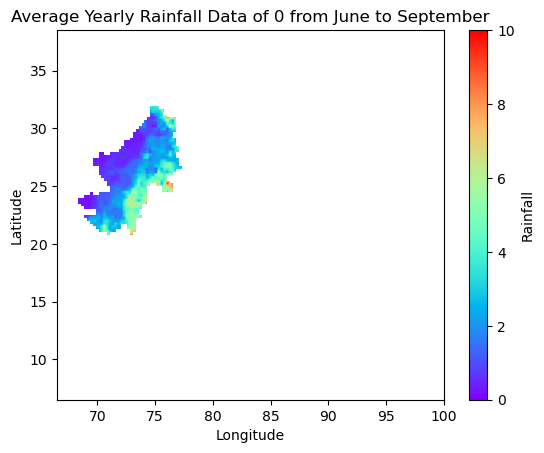

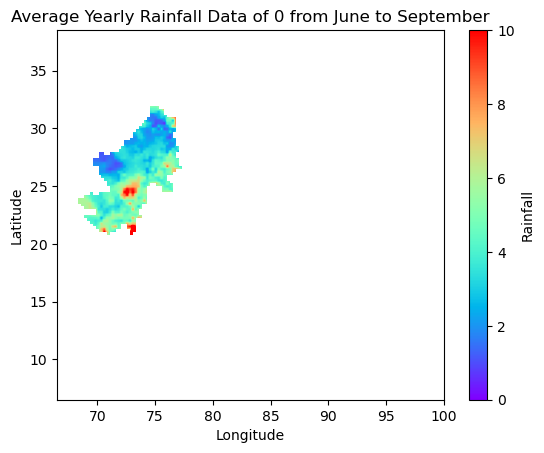

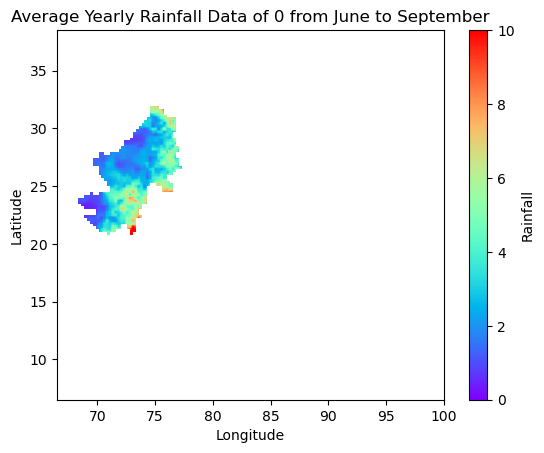

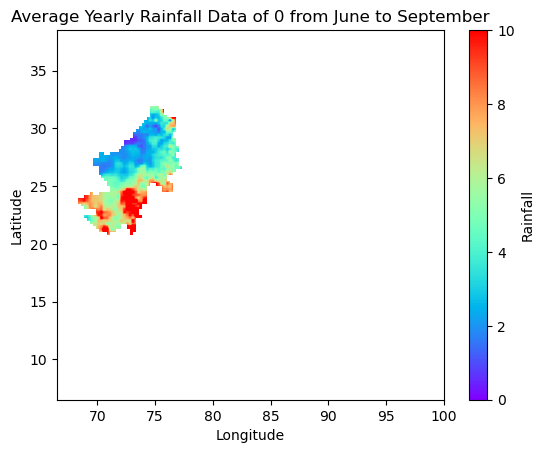

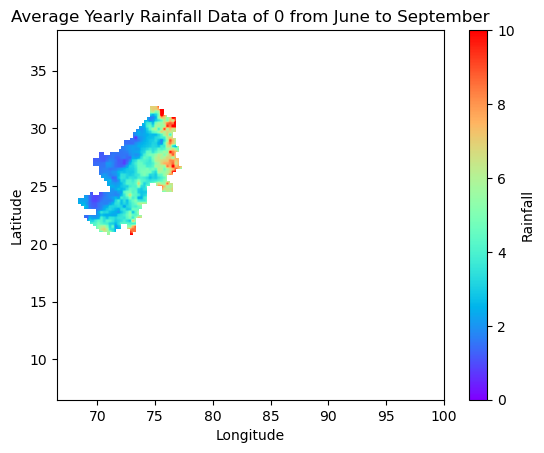

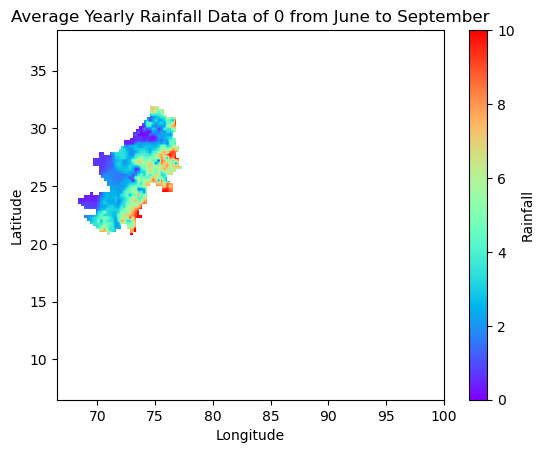

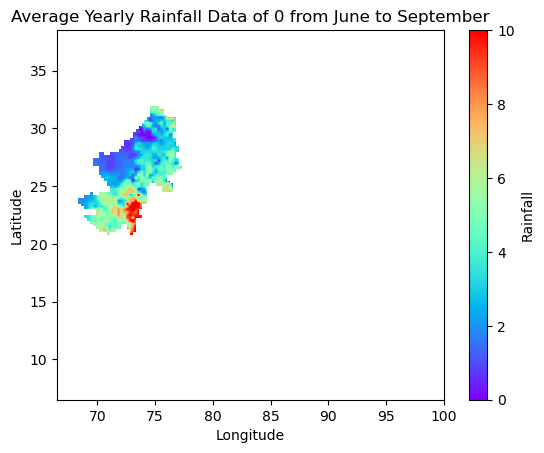

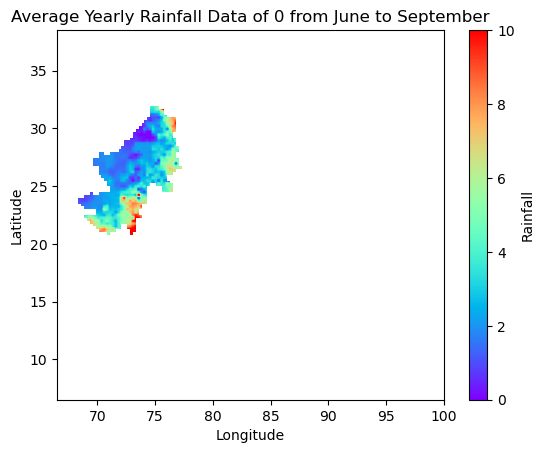

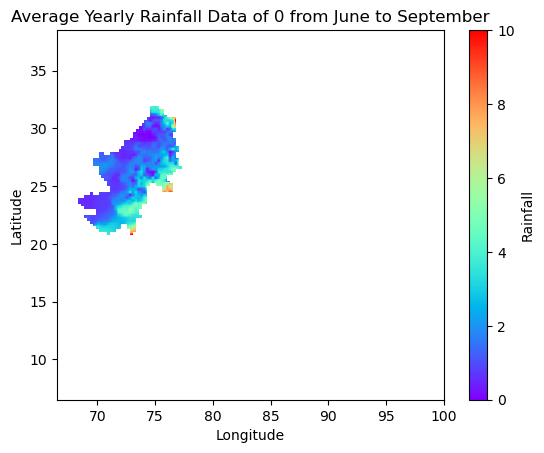

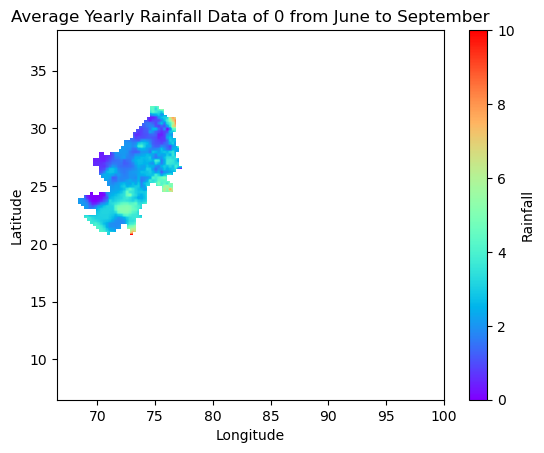

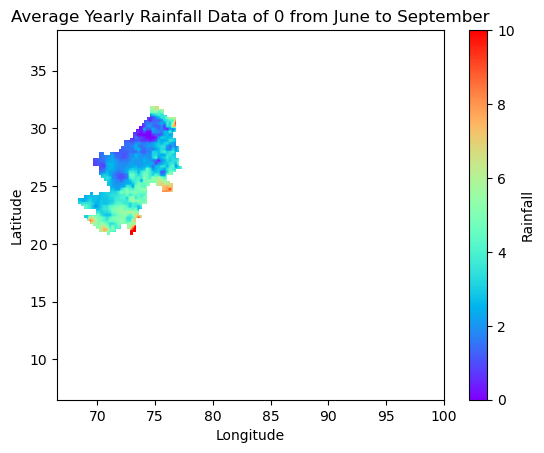

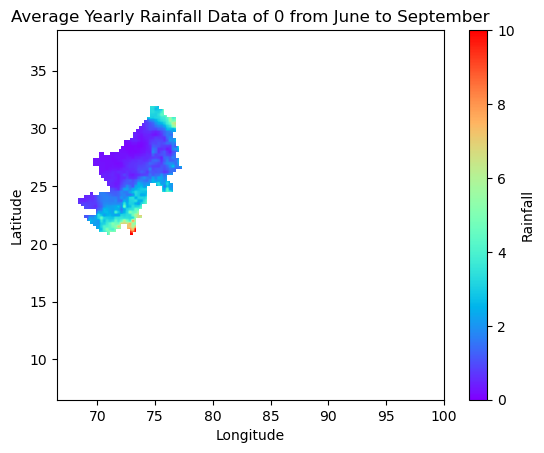

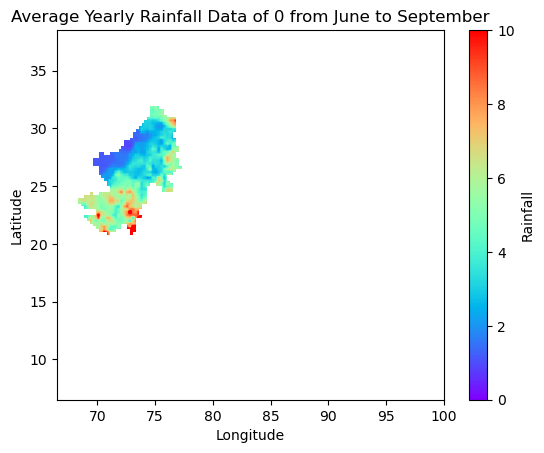

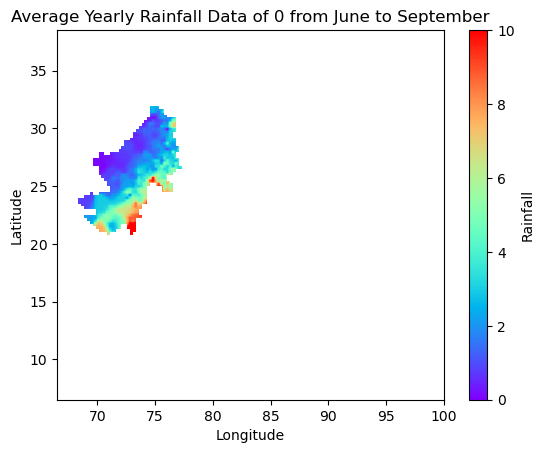

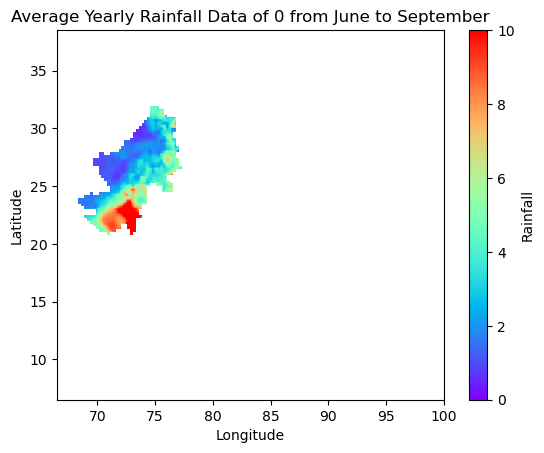

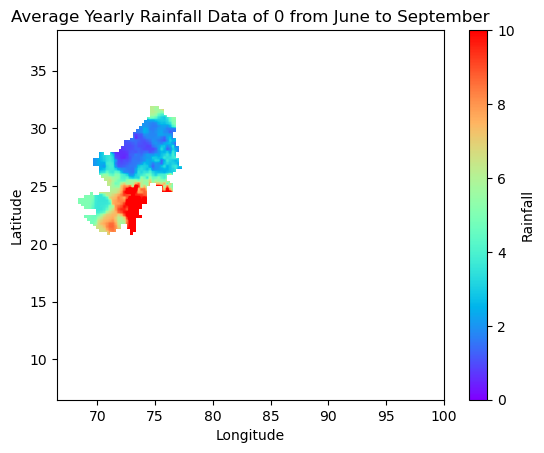

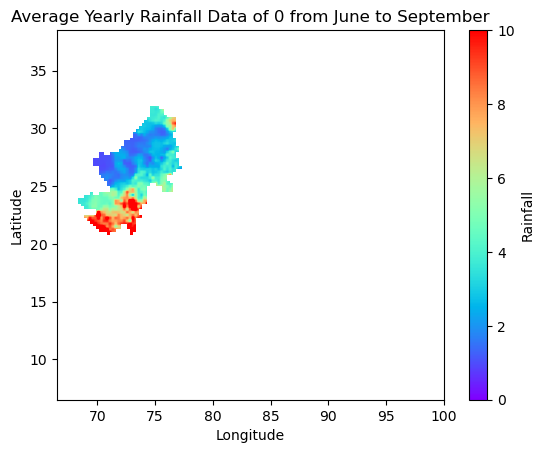

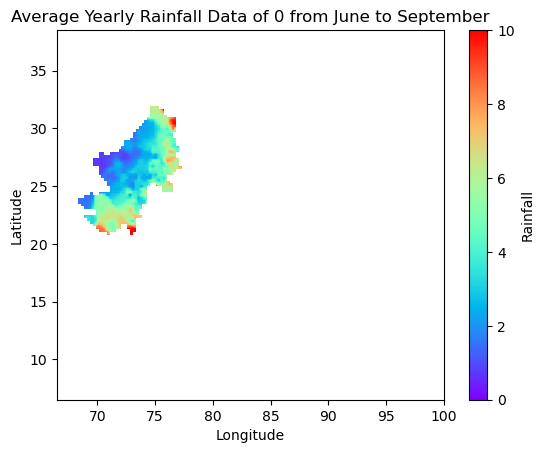

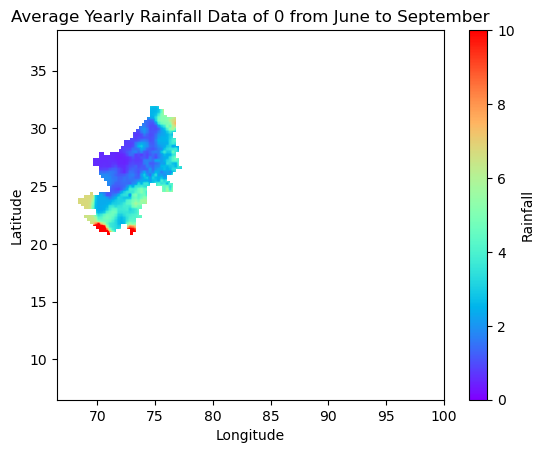

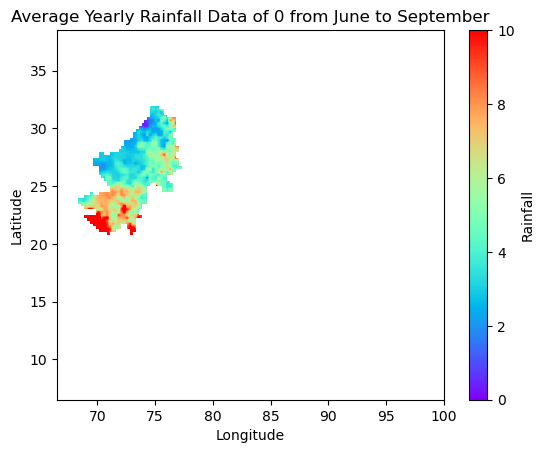

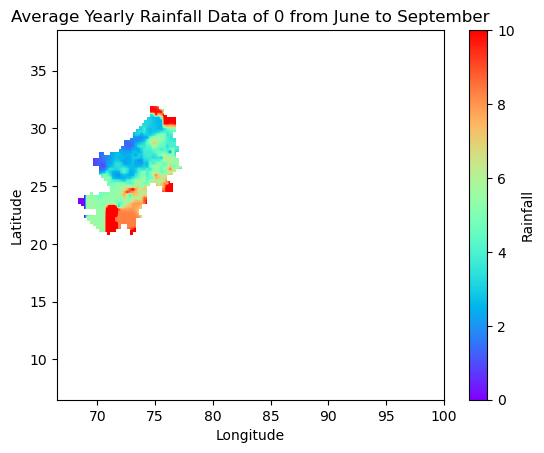

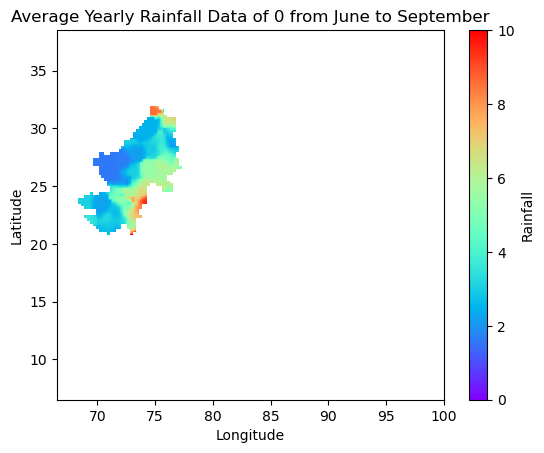

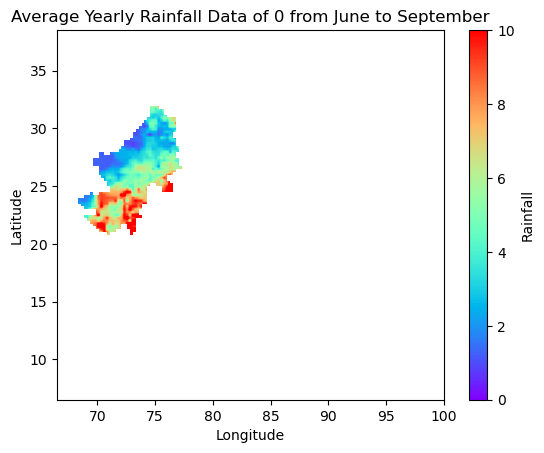

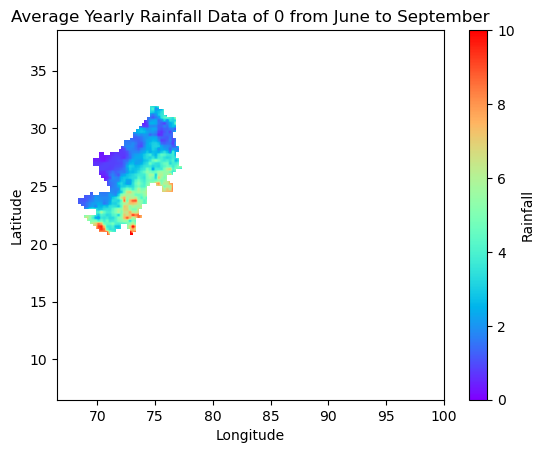

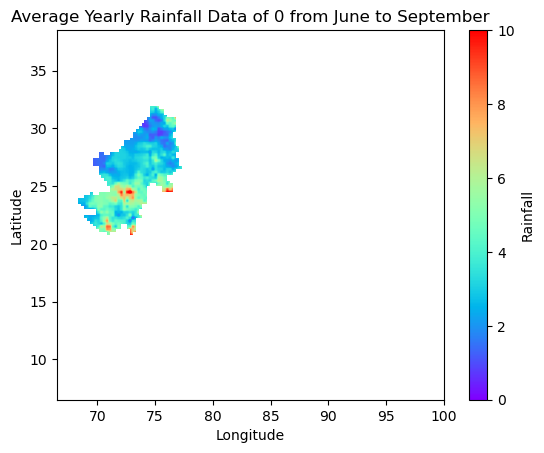

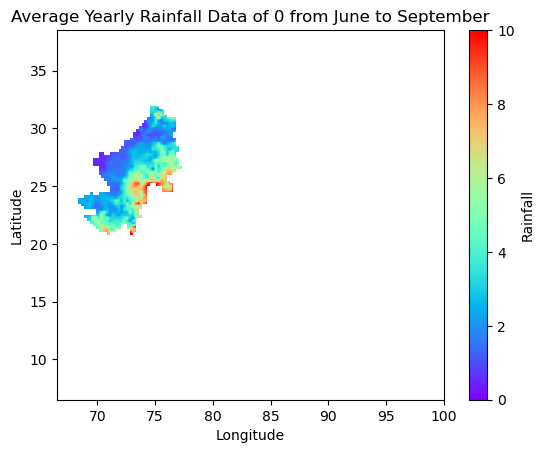

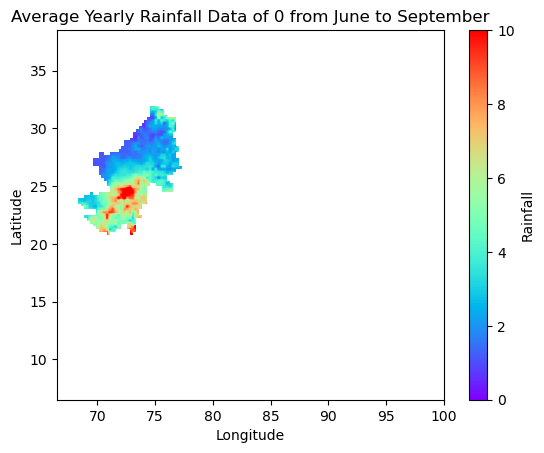

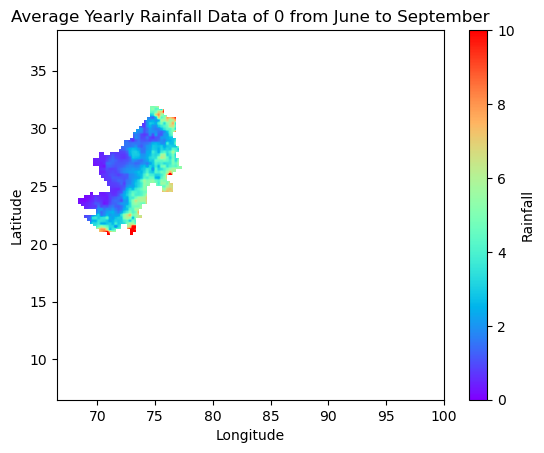

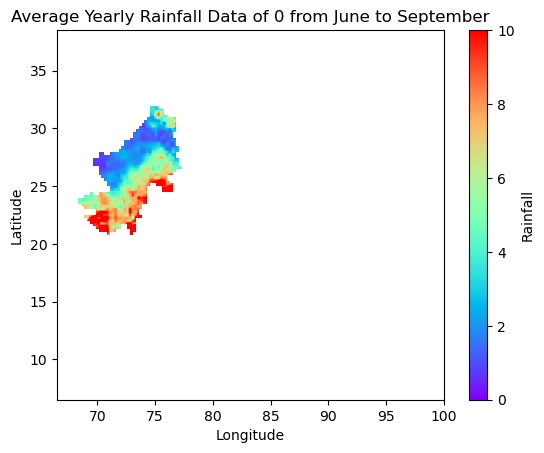

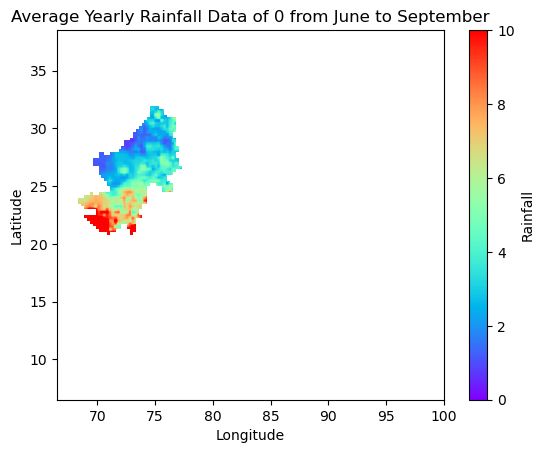

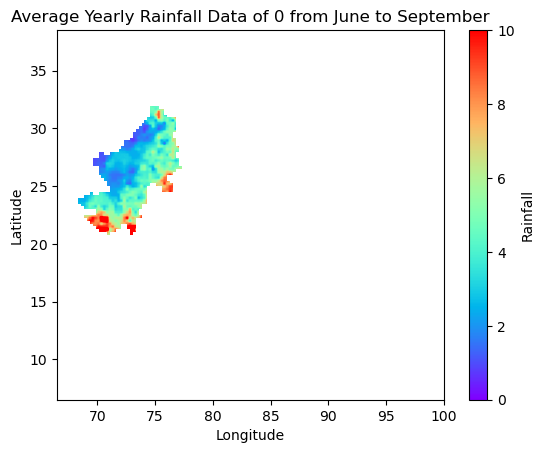

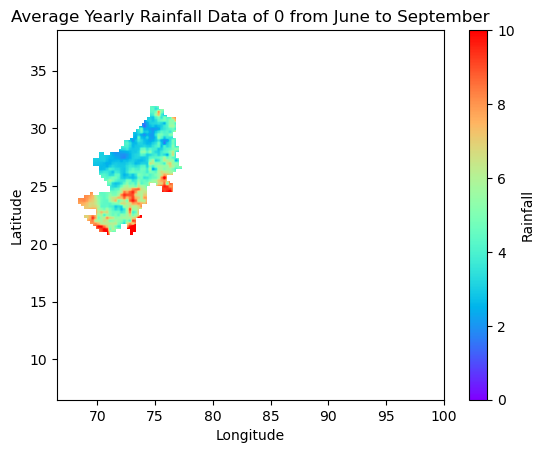

In [354]:
for i in range(len(zone1_means)):
    PlotMap(zone1_means[i])

In [365]:
#Saving the files
year=1901
for i in range(len(zone1_means)):
    zone1_means[i].to_netcdf(fr"IndianRainfall_JJAS_Zone1_{year}.nc")
    zone2_means[i].to_netcdf(fr"IndianRainfall_JJAS_Zone2_{year}.nc")
    zone3_means[i].to_netcdf(fr"IndianRainfall_JJAS_Zone3_{year}.nc")
    zone4_means[i].to_netcdf(fr"IndianRainfall_JJAS_Zone4_{year}.nc")
    zone5_means[i].to_netcdf(fr"IndianRainfall_JJAS_Zone5_{year}.nc")
    zone6_means[i].to_netcdf(fr"IndianRainfall_JJAS_Zone6_{year}.nc")
    year+=1